### <center>Ejercicio Cuadrados mínimos y regresión lineal

In [2]:
#           .:Biblotecas a implementar:.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

1) Programar eficientemente el cálculo de la pendiente y de la ordenada al origen para el método de cuadrados mínimos a partir de n puntos. No hacer operaciones de más o redundantes.

In [3]:
def cargarValores(n,eje):
    valores = []
    print(f"Cargando Valores de {eje}")
    for i in range(n): 
        valores.append(int(input(f"Ingrese {i+1}° valor: ")))
    return valores

def generarValoresAleatorios(n):
   return np.random.randint(1,
                            10,
                            size=n)  # Genera n números aleatorios entre 1 y 10

#Cálculo de Cuadrados Mínimos
def calculoDePendienteYOrdenada(x,y):  
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y)
    sumXY = np.sum(x*y)
    sumXCuadrados = np.sum(x**2)
    # cálculo de la pendiente (a) y la ordenada al origen (b)
    m = (n*sumXY-sumX*sumY) / (n*sumXCuadrados-sumX**2)
    b = (sumY-m*sumX) / n
    
    return m, b

# Grafico de Puntos de datos y la Línea
def plotPuntosYLineaAjustada(x,y,a,b):
    # Grafico los puntos
    plt.scatter(x,
                y, 
                color='#494D8A',
                label='Datos',
                s=20)
    
    # Grafico la línea de regresión
    plt.plot(x,
             a*x+b,
             color='red',
             label=f'Regresión lineal: y = {a:.2f}x + {b:.2f}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regresión lineal de datos')
    plt.legend()
    plt.grid(True)
    plt.show()



Tabla de Valores de x: [1 4 4 7 4]
Tabla de Valores de y: [9 8 2 6 9]

Pendiente: -0.5
Ordenada al origen: 8.8


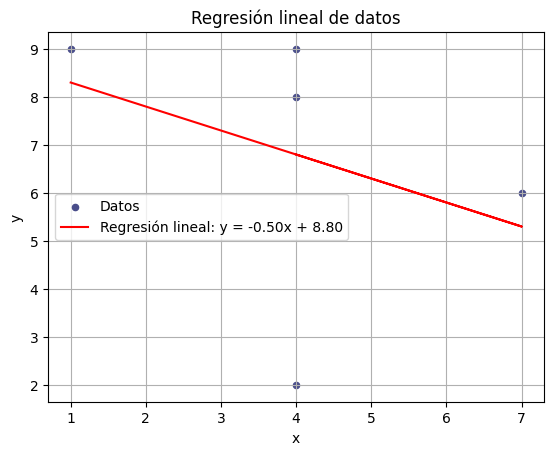

In [4]:
n = int(input("Ingrese la cantidad de puntos desea analizar: "))

x=generarValoresAleatorios(n)
y=generarValoresAleatorios(n)
'''
#En el caso que se desee ingresar valores manualmente
x=np.array(cargarValores(n,"X"))
y=np.array(cargarValores(n,"Y"))
'''

print("Tabla de Valores de x:", x)
print("Tabla de Valores de y:", y)

# Cálculo de la pendiente y la ordenada
a,b = calculoDePendienteYOrdenada(x, y) #Calculo de Cuadrados Mínimos
print("")
print("Pendiente:", a)
print("Ordenada al origen:", b)

# plot de la línea de regresión
plotPuntosYLineaAjustada(x, y, a, b)

2) Usar los datos del archivo Excel que aparece en la unidad, aplicar lo anterior y calcular, y por último graficar los puntos y la recta obtenida.

In [5]:
def abrirArchivo():
    return pd.read_excel('./ACUMULADOSvsDIAS.xlsx', sheet_name='Hoja1')


In [6]:
# Leer el archivo Excel
df=abrirArchivo()
df.head() # Muestra las primeras filas del DataFrame

,día,acumulados
0,1,1
1,2,1
2,3,2
3,4,8
4,5,9


In [7]:
#Datos generales de la tabla
print(f"Columnas:{df.shape[1]}")
print(f"Filas:   {df.shape[0]}")

Columnas:2
Filas:   169


In [8]:
#Verifico que no haya valores faltantes
print("Valores faltantes:")
df.isnull().any()

Valores faltantes:


día           False
acumulados    False
dtype: bool

In [9]:
#Verifico que no hayan valores NaN
if df.isnull().values.any():
    print("Existen valores NaN")
else:
    print("No existen valores NaN")

No existen valores NaN


In [10]:
#Información de los datos a utilizar 
df.describe()

,día,acumulados
count,169.000000,169.000000
mean,85.000000,57422.041420
std,48.930222,82364.839983
min,1.000000,1.000000
25%,43.000000,2443.000000
50%,85.000000,13228.000000
75%,127.000000,83426.000000
max,169.000000,305966.000000



Pendiente: 1406.5942618467504
Ordenada al origen: -62138.47083685545


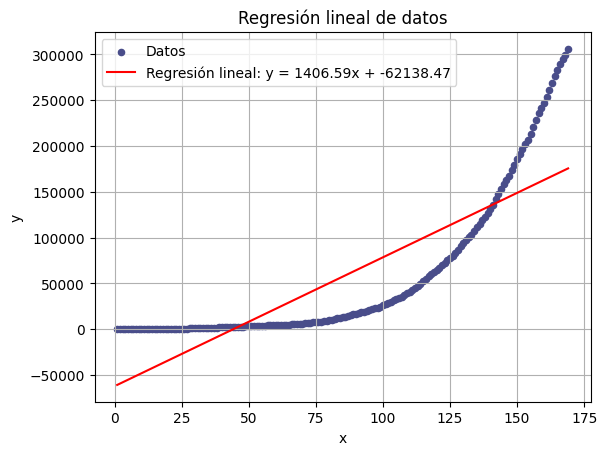

In [11]:
# Extraigo las columnas x e y
x= df['día']
y= df['acumulados']

# Calculo de la pendiente y la ordenada
a,b = calculoDePendienteYOrdenada(x, y) #Calculo de Cuadrados Mínimos
print("")
print("Pendiente:", a)
print("Ordenada al origen:", b)

# plot la línea de regresión
plotPuntosYLineaAjustada(x, y, a, b)

3) Sobre los mismos datos, ajustar una curva de la forma y = b*e^(ax), convirtiéndola previamente en lineal y aplicando luego regresión lineal. Comparar de alguna forma la curva obtenida con la anterior.

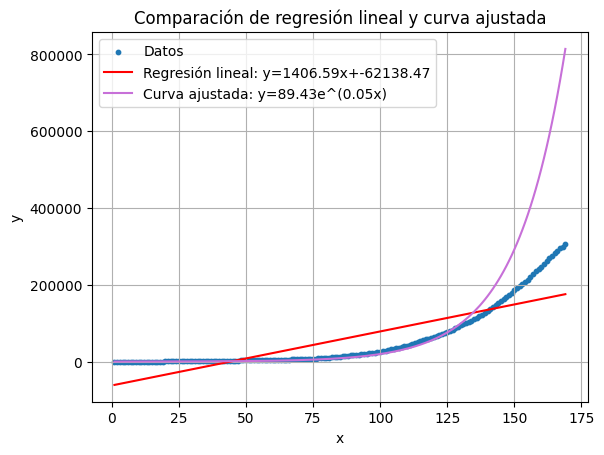

In [12]:
# Transformo los datos para linealizar la curva
#Esto se hace para convertir la ecuación exponencial y = b*e^(ax) en una ecuación lineal -> ln(y)=ln(b)+ax
logY = np.log(y)

# Calculo la regresión lineal sobre los datos transformados
aLog, bLog = calculoDePendienteYOrdenada(x, logY)

# Calculo los parámetros finales de la curva original
bFinal = np.exp(bLog)
aFinal = aLog

# Grafico los puntos
plt.scatter(x,
            y, 
            label='Datos',
            s=10)

# Grafico la regresión lineal
plt.plot(x,
         a*x + b,
         color='red',
         label=f'Regresión lineal: y={a:.2f}x+{b:.2f}')

# Grafico la curva ajustada
plt.plot(x,
         bFinal * np.exp(aFinal*x), 
         color='#C770D8',
         label=f'Curva ajustada: y={bFinal:.2f}e^({aFinal:.2f}x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Comparación de regresión lineal y curva ajustada')
plt.show()